In [1]:
# pip install yfinance
#!pip install streamlit 

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end,auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2005-12-05,10.039658,10.108361,10.398524,10.069258,10.386070,413118688
2005-12-06,10.007253,10.075734,10.371376,10.004999,10.179345,607279734
2005-12-07,9.999336,10.067764,10.129532,9.938000,10.116082,468385066
2005-12-08,10.158396,10.227913,10.227913,10.028411,10.094663,357735875
2005-12-09,10.122527,10.191799,10.355684,10.175858,10.336257,306881974


In [6]:
google_data.shape

(5031, 6)

In [7]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,57.459488,57.790578,58.391617,57.165902,57.760444,9.013704e+07
std,56.340928,56.555416,57.186071,55.898923,56.507380,1.133533e+08
min,6.368385,6.411966,6.709103,6.159413,6.538243,1.584340e+05
25%,14.348535,14.446725,14.570262,14.297534,14.441494,2.530200e+07
50%,34.651375,34.888500,35.199501,34.549999,34.918999,4.219600e+07
75%,86.497822,87.089748,88.334126,86.419998,87.184998,1.114582e+08
max,323.640015,323.640015,328.670013,317.816010,326.799988,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-12-05 to 2025-12-03
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5031 non-null   float64
 1   (Close, GOOG)      5031 non-null   float64
 2   (High, GOOG)       5031 non-null   float64
 3   (Low, GOOG)        5031 non-null   float64
 4   (Open, GOOG)       5031 non-null   float64
 5   (Volume, GOOG)     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [9]:
google_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 1500x500 with 0 Axes>

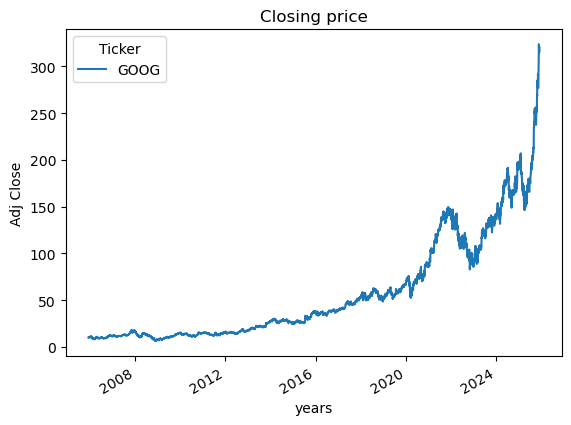

In [11]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price")
plt.show()

In [12]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    plt.show()
    

In [13]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

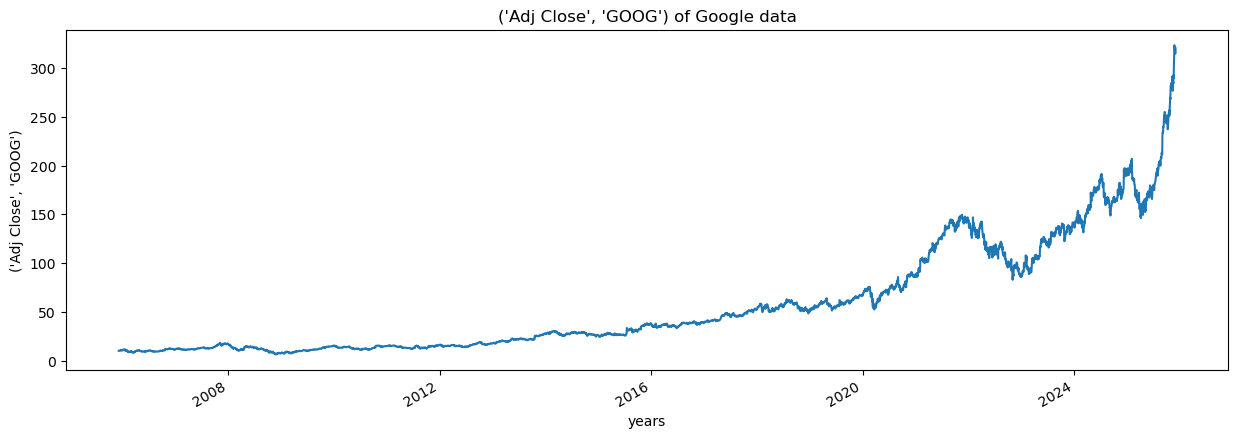

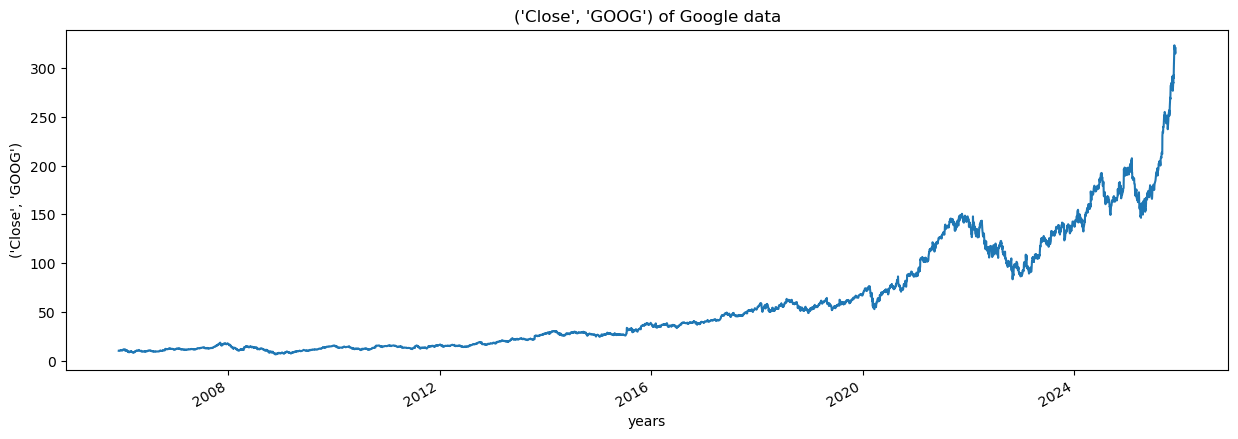

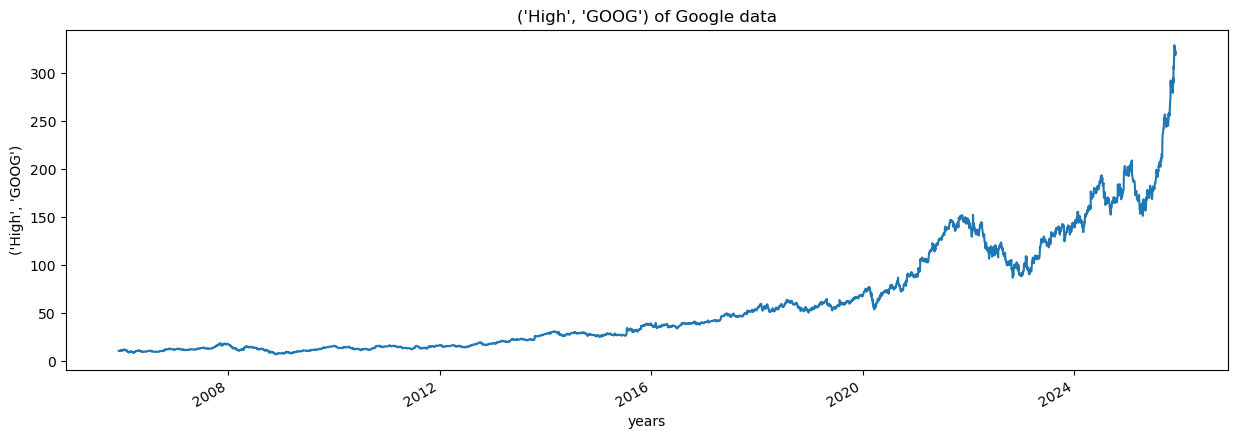

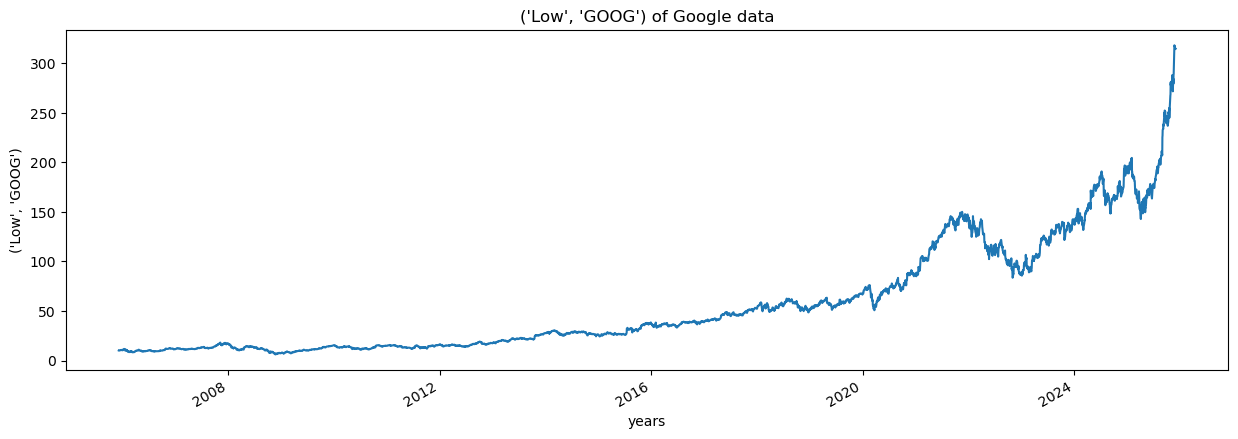

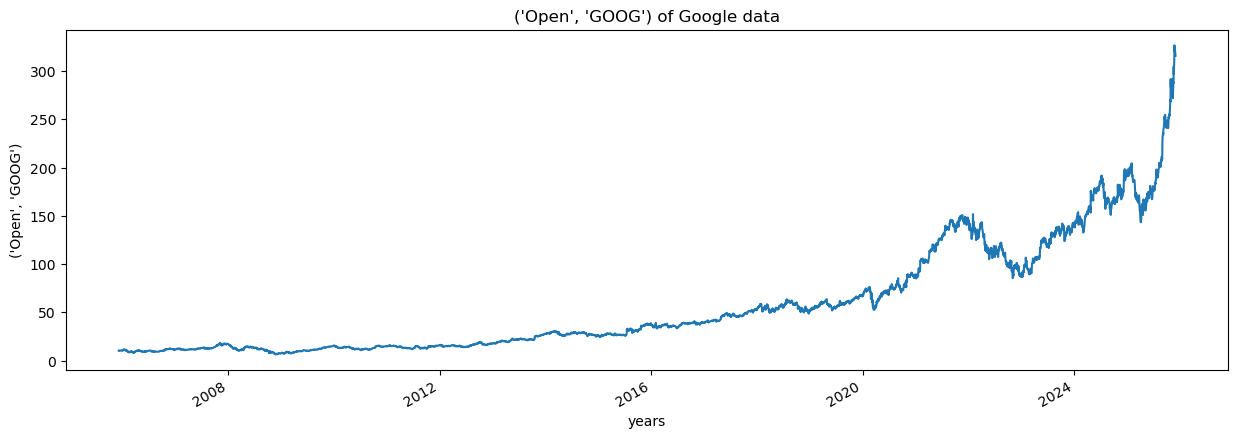

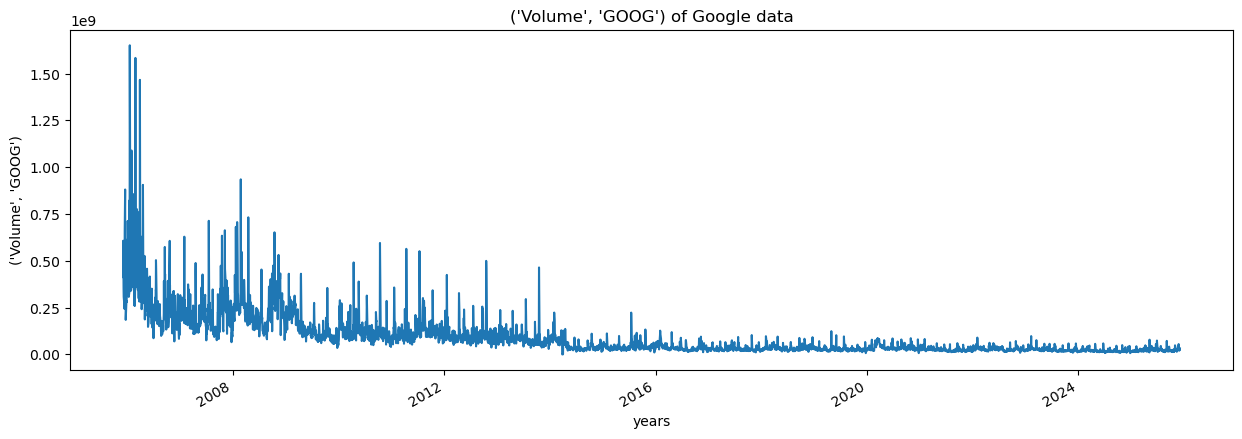

In [14]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 19
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-11-24          NaN
2006-11-27          NaN
2006-11-28          NaN
2006-11-29          NaN
2006-11-30    10.063531
Name: MA_for_250_days, dtype: float64

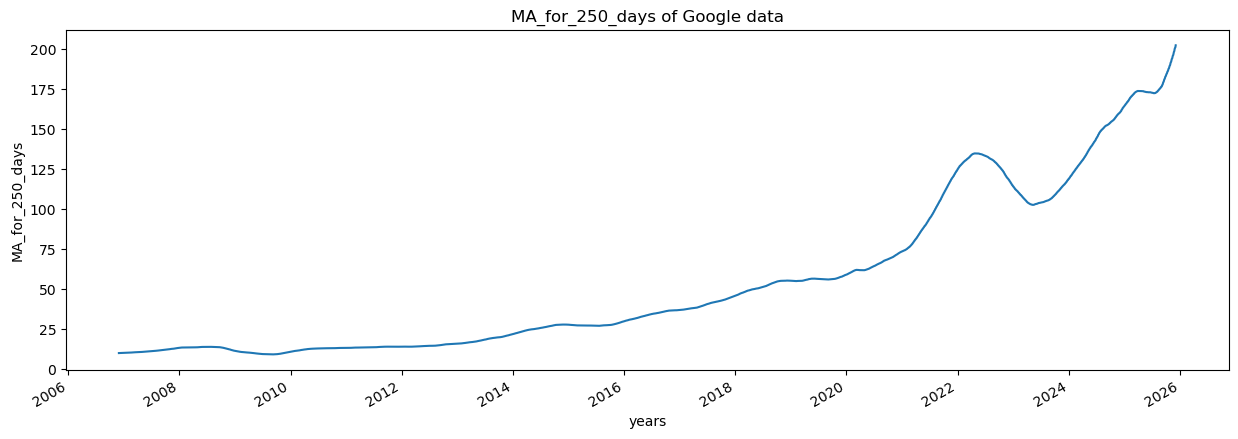

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

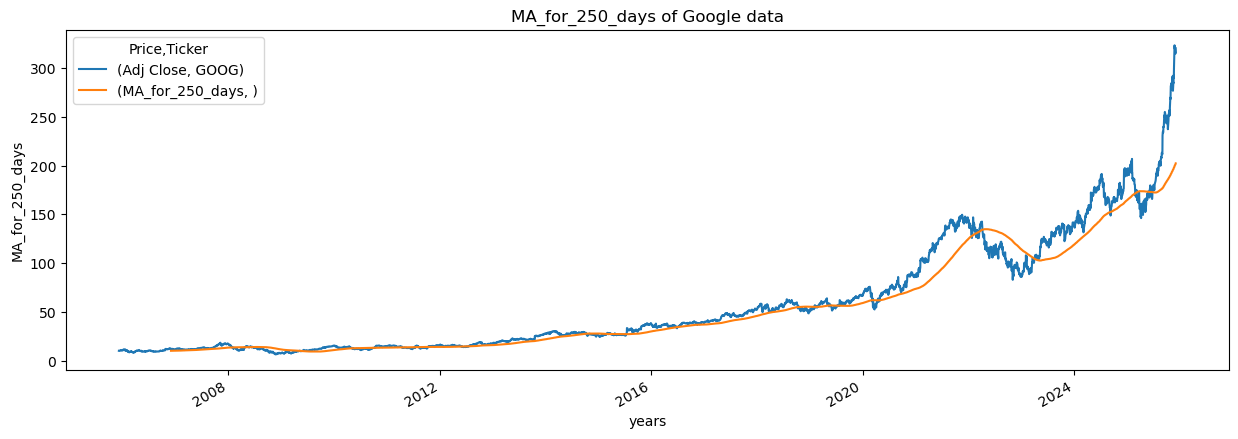

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

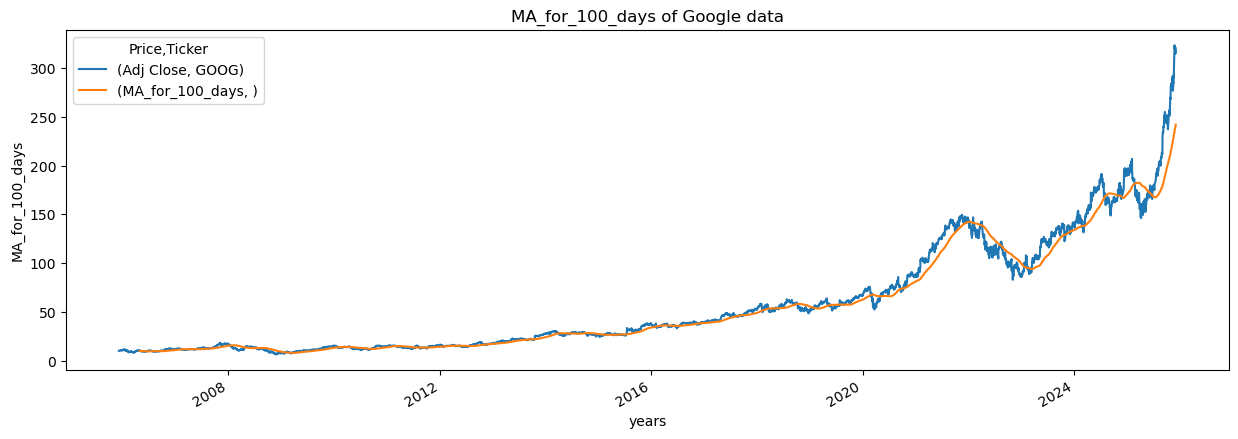

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

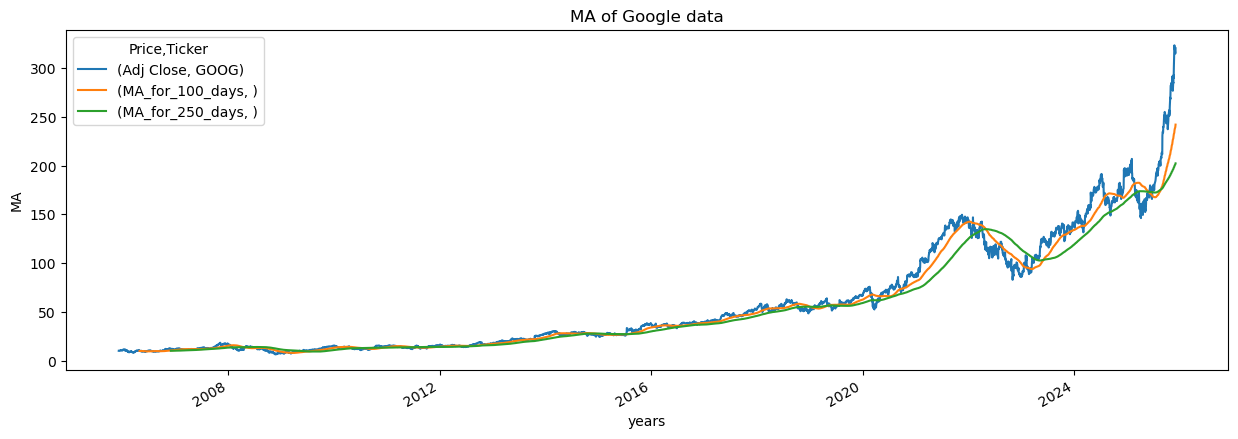

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-12-05,10.039658,NaN
2005-12-06,10.007253,-0.003228
2005-12-07,9.999336,-0.000791
2005-12-08,10.158396,0.015907
2005-12-09,10.122527,-0.003531


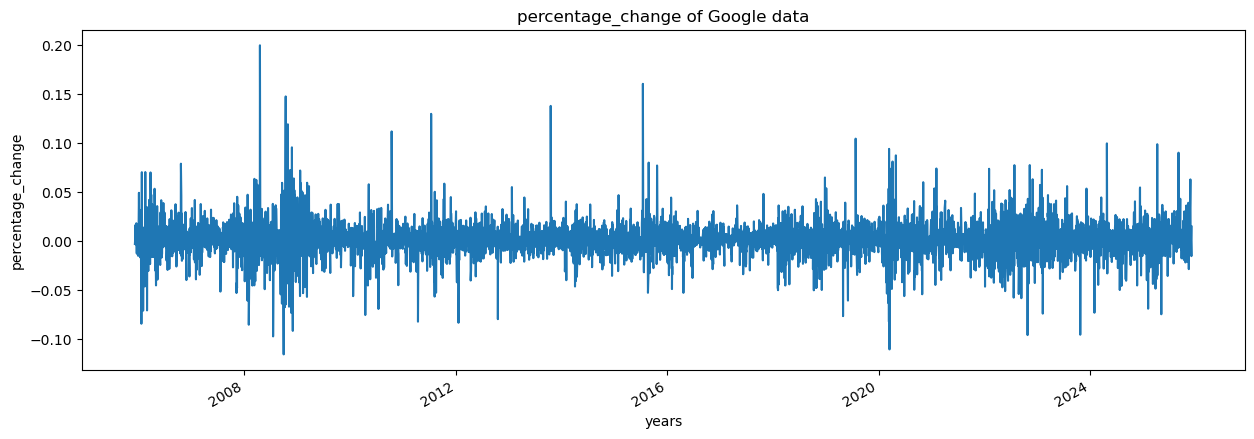

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([323.64001465]), array([6.36838484]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01157139],
       [0.01146925],
       [0.0114443 ],
       ...,
       [0.97314598],
       [0.97598264],
       [0.99048128]])

In [31]:
len(scaled_data)

5031

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.01157139],
        [0.01146925],
        [0.0114443 ],
        [0.01194563],
        [0.01183258],
        [0.01209846],
        [0.01247895],
        [0.01259356],
        [0.01287347],
        [0.01346603],
        [0.01303331],
        [0.01343407],
        [0.01316819],
        [0.0136134 ],
        [0.01352684],
        [0.01303642],
        [0.01319626],
        [0.01268634],
        [0.01227389],
        [0.01386212],
        [0.01464259],
        [0.0151104 ],
        [0.01623471],
        [0.0163314 ],
        [0.01655439],
        [0.01670019],
        [0.01607644],
        [0.01628072],
        [0.01634777],
        [0.01461686],
        [0.01395724],
        [0.01107317],
        [0.01325942],
        [0.01447027],
        [0.01368825],
        [0.01378727],
        [0.01372645],
        [0.0132064 ],
        [0.01366173],
        [0.01125406],
        [0.01080651],
        [0.00967674],
        [0.00995353],
        [0.00861402],
        [0.00870446],
        [0

In [34]:

int(len(x_data)*0.7)

3451

In [35]:
4908-100-int(len(x_data)*0.7)

1357

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\hudai\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 74s 21ms/step - loss: 6.2283e-05
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - loss: 2.1675e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [44]:
predictions

array([[0.19553511],
       [0.19580358],
       [0.19681399],
       ...,
       [0.8862016 ],
       [0.87515813],
       [0.8680479 ]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 68.40613],
       [ 68.4913 ],
       [ 68.81188],
       ...,
       [287.535  ],
       [284.03122],
       [281.77536]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 71.47090912],
       [ 72.09165955],
       [ 73.5164032 ],
       ...,
       [315.11999512],
       [316.01998901],
       [320.61999512]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [48]:
rmse

8.816376244900148

In [49]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-01-15,71.470909,68.406128
2020-01-16,72.091660,68.491302
2020-01-17,73.516403,68.811882
2020-01-21,73.715546,69.659576
2020-01-22,73.792519,70.359833


<Figure size 640x480 with 0 Axes>

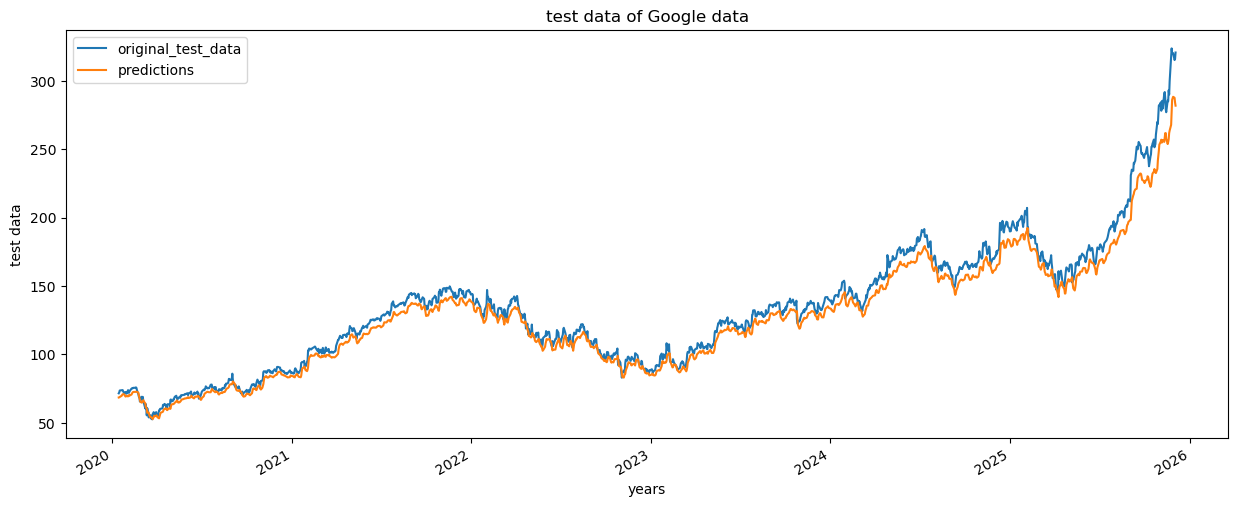

In [50]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

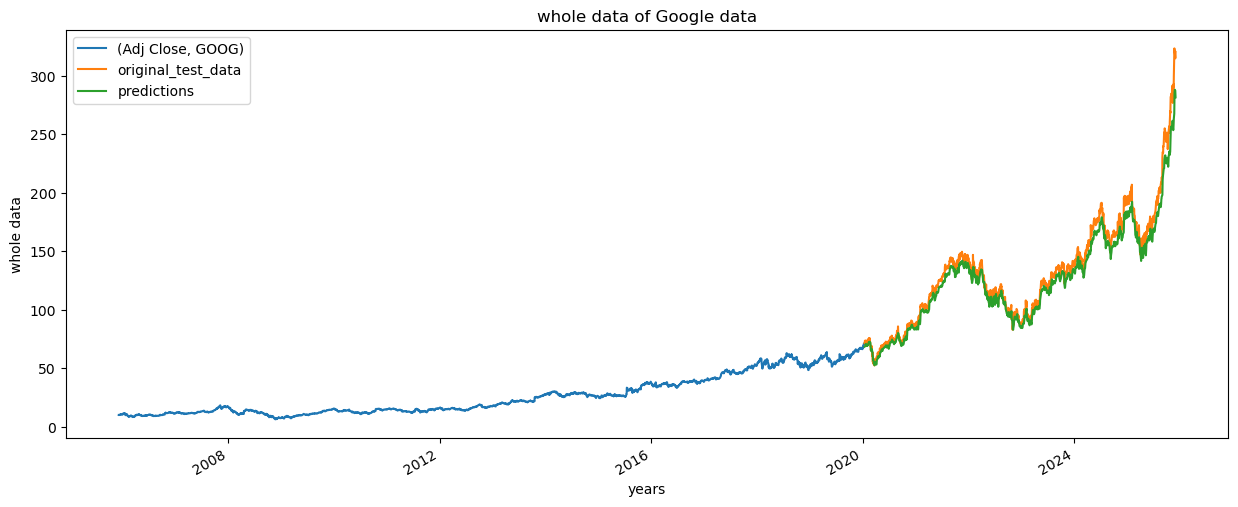

In [51]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save("Latest_stock_price_model.keras")

In [53]:
import os
print("Model saved at:", os.path.abspath("Latest_stock_price_model.keras"))

Model saved at: C:\Users\hudai\Desktop\Stock\Latest_stock_price_model.keras
